# EDA

In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import tensorflow
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import warnings
warnings.filterwarnings("ignore")


In [ ]:
data=pd.read_csv('traffic.csv')
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1) #dropping IDs to filter data
data.info

<bound method DataFrame.info of                  DateTime  Junction  Vehicles
0     2015-11-01 00:00:00         1        15
1     2015-11-01 01:00:00         1        13
2     2015-11-01 02:00:00         1        10
3     2015-11-01 03:00:00         1         7
4     2015-11-01 04:00:00         1         9
...                   ...       ...       ...
48115 2017-06-30 19:00:00         4        11
48116 2017-06-30 20:00:00         4        30
48117 2017-06-30 21:00:00         4        16
48118 2017-06-30 22:00:00         4        22
48119 2017-06-30 23:00:00         4        12

[48120 rows x 3 columns]>

Text(0.5, 0, 'Date')

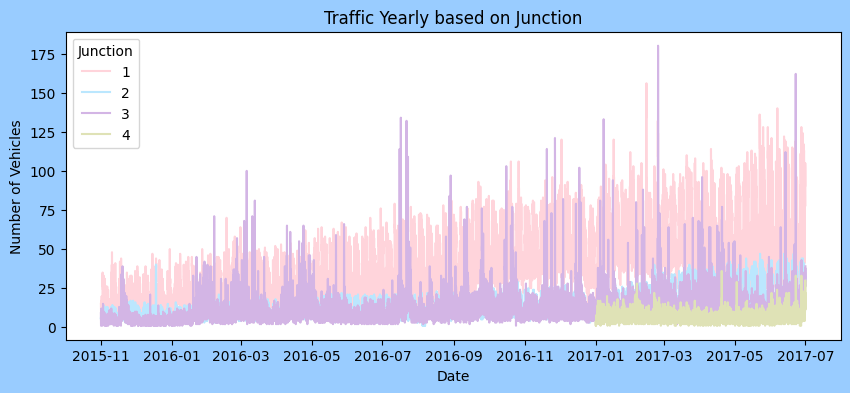

In [ ]:
df=data.copy()
# to plot the Timeseries graph to analyze data
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(10,4),facecolor="#99ccff")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction", palette=colors)
Time_series.set_title("Traffic Yearly based on Junction")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

In [ ]:
#Exploring more features
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


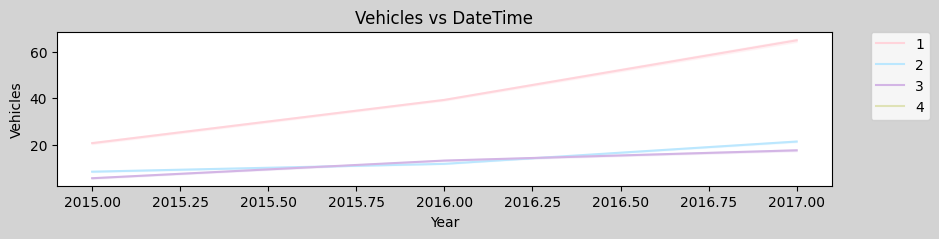

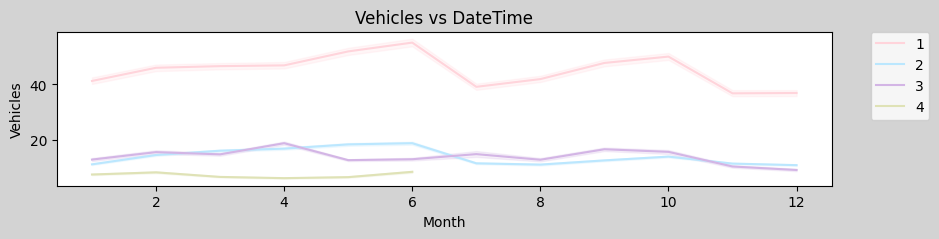

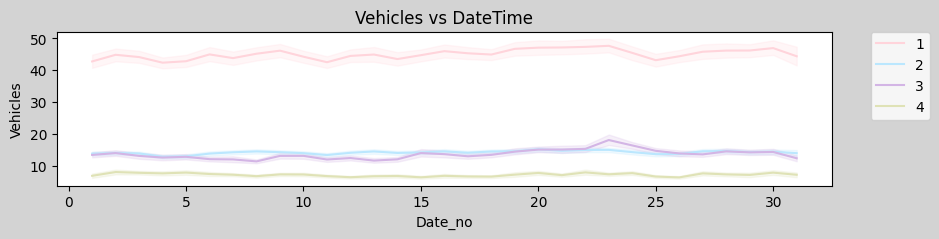

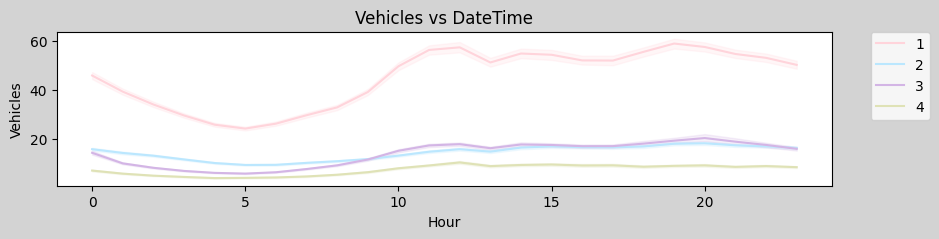

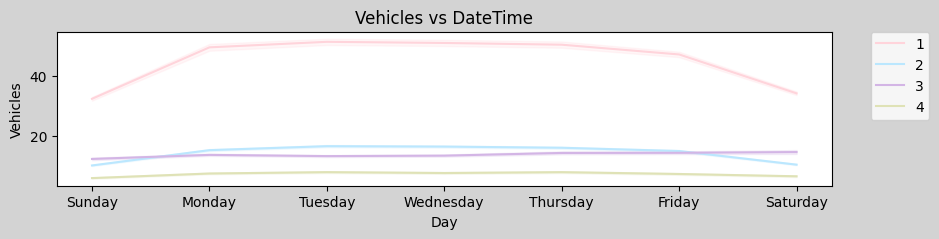

In [ ]:
new_features = ["Year", "Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10, 2), facecolor="lightgray")  # Change facecolor here
    ax = sns.lineplot(x=df[i], y="Vehicles", data=df, hue="Junction", palette=colors)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(f"Vehicles vs DateTime")
    plt.show()



Text(0.5, 0, 'Date')

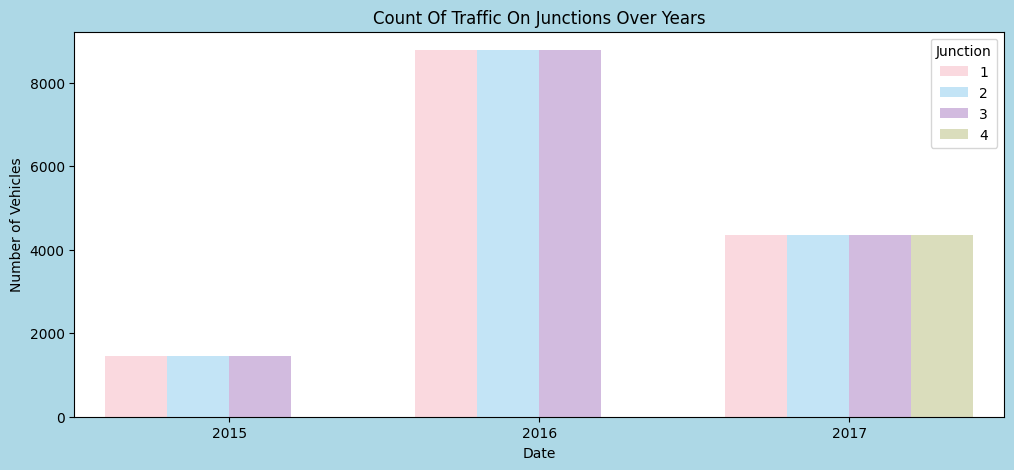

In [ ]:
plt.figure(figsize=(12,5),facecolor="lightblue")
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

<Axes: >

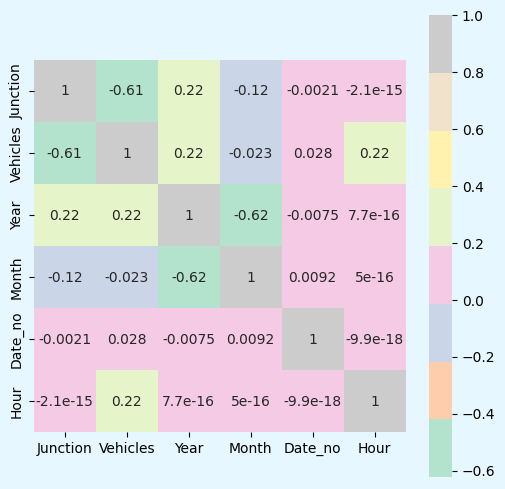

In [ ]:
import numpy as np
# Select only numeric dtypes
numeric_df = df.select_dtypes(include=[np.number])

# Computing correlation matrix
corrmat = numeric_df.corr()

# Plotting heatmap
plt.subplots(figsize=(6, 6), facecolor="#e6f7ff")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True)

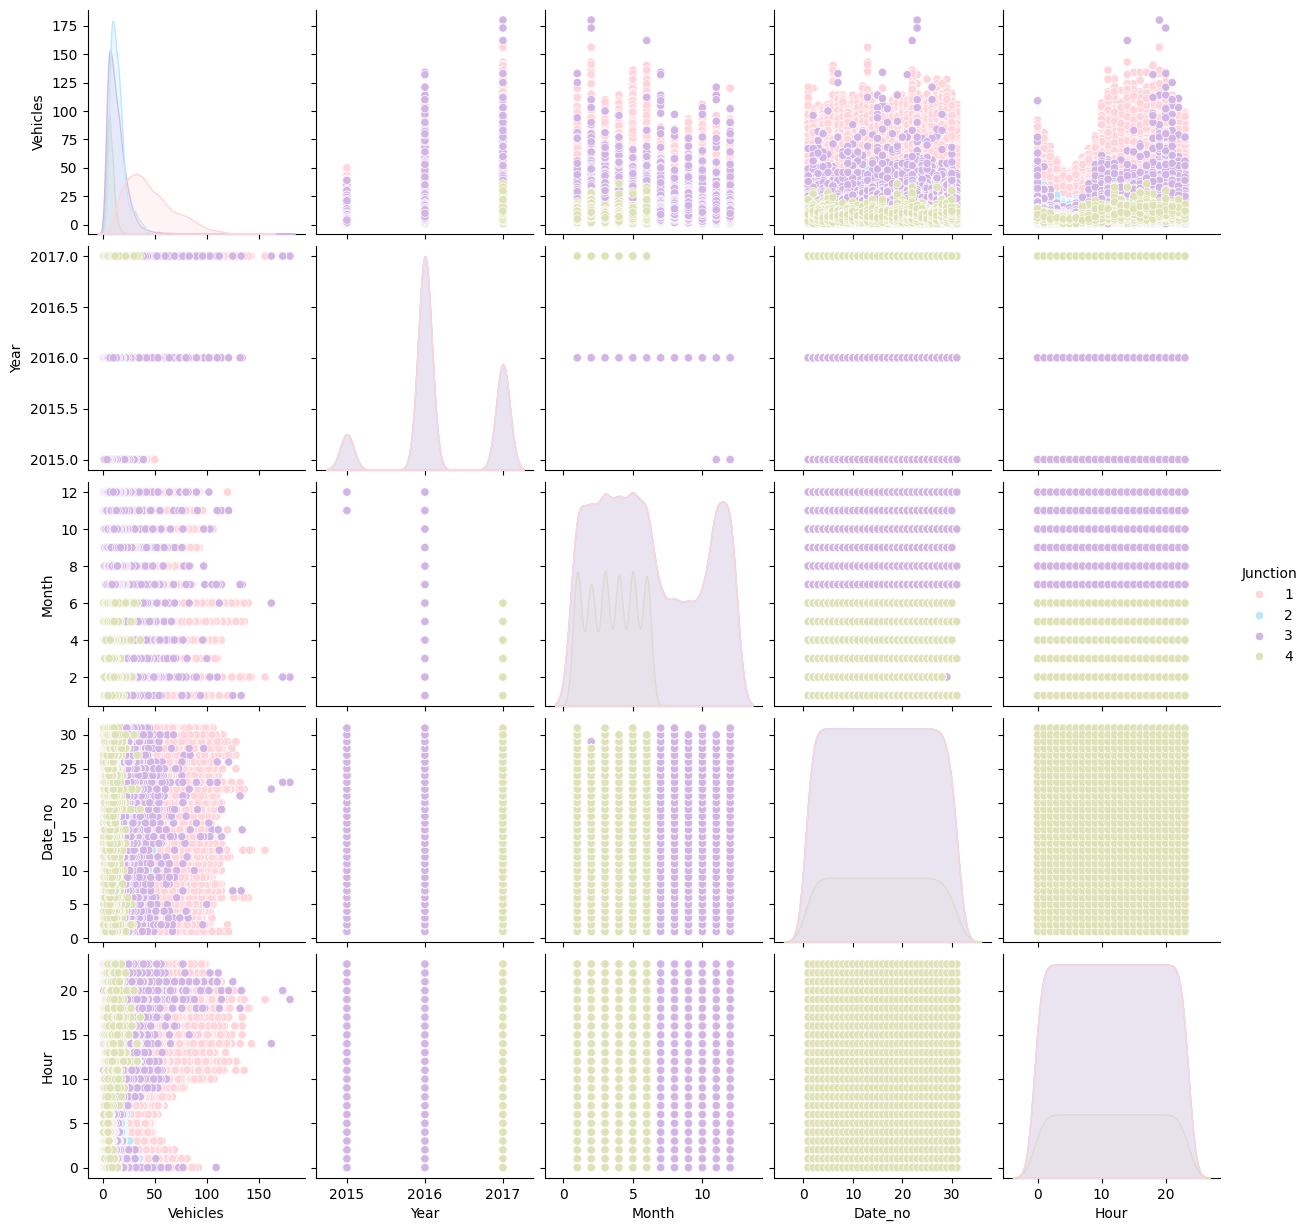

In [ ]:
sns.pairplot(data=df, hue= "Junction",palette=colors)

# Deep Learning Model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import warnings
warnings.filterwarnings("ignore")

# Load the traffic data from a CSV file into a pandas DataFrame.
data = pd.read_csv('traffic.csv')
data.head()

# Convert the "DateTime" column to datetime objects for easier manipulation.
data["DateTime"] = pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1)  # dropping IDs
data.info


<bound method DataFrame.info of                  DateTime  Junction  Vehicles
0     2015-11-01 00:00:00         1        15
1     2015-11-01 01:00:00         1        13
2     2015-11-01 02:00:00         1        10
3     2015-11-01 03:00:00         1         7
4     2015-11-01 04:00:00         1         9
...                   ...       ...       ...
48115 2017-06-30 19:00:00         4        11
48116 2017-06-30 20:00:00         4        30
48117 2017-06-30 21:00:00         4        16
48118 2017-06-30 22:00:00         4        22
48119 2017-06-30 23:00:00         4        12

[48120 rows x 3 columns]>

In [ ]:

df = data.copy()
# Exploring more features
df["Year"] = df['DateTime'].dt.year
df["Month"] = df['DateTime'].dt.month
df["Date_no"] = df['DateTime'].dt.day
df["Hour"] = df['DateTime'].dt.hour
df["Day"] = df.DateTime.dt.strftime("%A")
df.head()



,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


In [ ]:
# Function to normalize a specific column in a DataFrame.
def Normalize(df, col):
    avg = df[col].mean()
    stdn = df[col].std()
    df_normalized = (df[col] - avg) / stdn
    df_normalized = df_normalized.to_frame()
    return df_normalized, avg, stdn

# Function to compute the difference between current and past values at a specific interval.
def Difference(df, col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

# Normalize the 'Vehicles' column in the dataset.
df_N, av, std = Normalize(data, "Vehicles")
Diff = Difference(df_N, col="Vehicles", interval=(24 * 7))  # taking a week's difference
df_N = df_N[24 * 7:]
df_N.columns = ["Norm"]
df_N["Diff"] = Diff

# Drop any rows with NaN values resulting from the difference operation.
df = df_N["Diff"].dropna()
# Ensure 'df' is a DataFrame.
df = df.to_frame()
df.head()

# Function to split the DataFrame into training and testing sets based on a given ratio.
def Split_data(df):
    training_size = int(len(df) * 0.80)
    data_len = len(df)
    train, test = df[0:training_size], df[training_size:data_len]
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test

# Split the data into training and testing sets.
df_train, df_test = Split_data(df)

# Function to prepare the data for Time Series Forecasting.
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X, y

# Function to adjust the shape of the feature sets for the neural network input.
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0], test.shape[1], 1))
    return train, test

# Prepare the training and testing data.
X_train, y_train = TnF(df_train)
X_test, y_test = TnF(df_test)
X_train, X_test = FeatureFixShape(X_train, X_test)



In [ ]:
# Custom Layer Definition
class CustomLayer(layers.Layer):
    def __init__(self, units=32):
        super(CustomLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        #Build method to create the layer's weights.Parameters:input_shape (tuple): Shape of the input tensor.
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer="zeros",
            trainable=True,
        )

    def call(self, inputs):
      #Forward pass method of the layer.Parameters:inputs (tensor): Input tensor to the layer.
        return tf.matmul(inputs, self.w) + self.b



------Deep Learning Model------
Epoch 1/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0823 - val_loss: 0.1092
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0669 - val_loss: 0.1030
Epoch 3/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0618 - val_loss: 0.1019
Epoch 4/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0627 - val_loss: 0.0980
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0598 - val_loss: 0.0969
Epoch 6/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0591 - val_loss: 0.0964
Epoch 7/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0588 - val_loss: 0.0962
Epoch 8/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0581 - val_loss: 0.0963
Epoch 9/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0580 - val_loss: 0.0959
Epoch 10/50
320/320 [==============================] - 1s 3ms/step -

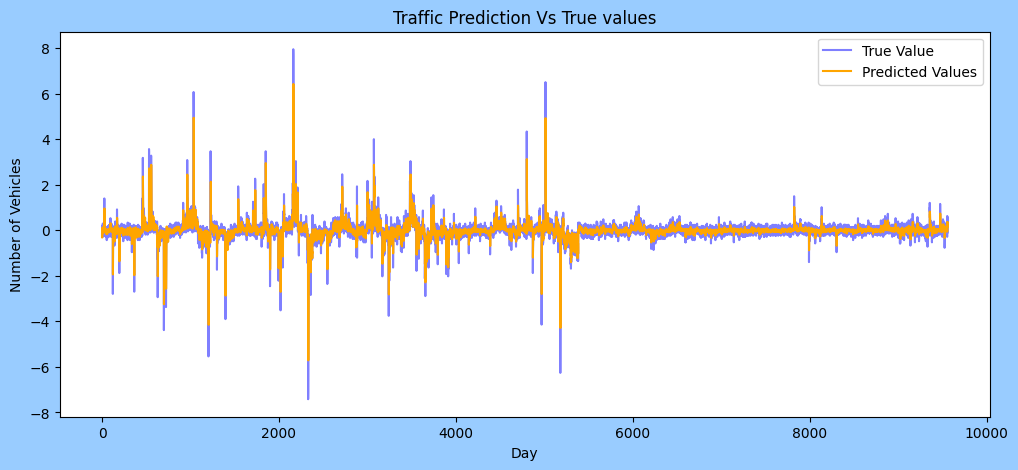

In [ ]:
# Learning Rate Schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

# Model for Traffic Prediction
def DeepLearning_Model(X_Train, y_Train, X_Test, y_Test):
    # Define Early Stopping Callback
    early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)
    # Construct the model
    model = Sequential()
    model.add(layers.Flatten(input_shape=(X_Train.shape[1], X_Train.shape[2])))  # Flatten layer
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(CustomLayer(50))  # Custom layer
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    # Compile the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9), loss='mean_squared_error')
    # Train the model
    model.fit(X_Train, y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120, callbacks=[early_stopping])
    DLmodel = model.predict(X_Test)
    return DLmodel

# Root Mean Squared Error Calculation
def RMSE_Value(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

# Plot Predictions
def PredictionsPlot(test, predicted, m):
    plt.figure(figsize=(12, 5), facecolor="#99ccff")
    plt.plot(test, color='blue', label="True Value", alpha=0.5)
    plt.plot(predicted, color="orange", label="Predicted Values")
    plt.title("Traffic Prediction Vs True values")
    plt.xlabel("Day")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

# Predictions For First Junction
print("------Deep Learning Model------")
Pred_DL = DeepLearning_Model(X_train, y_train, X_test, y_test)
print("-" * 70)

# Results for J1 - deep learning Model
print("-----Deep Learning Model------")
RMSE_DL = RMSE_Value(y_test, Pred_DL)
PredictionsPlot(y_test, Pred_DL, 0)

In [ ]:
predictions_df = pd.DataFrame({'True Values': y_test.flatten(), 'Predicted Values': Pred_DL.flatten()})
predictions_df.to_csv('predictions.csv', index=False)

# Time Series Model

In [ ]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow as tf
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import callbacks
from tensorflow import keras
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv('traffic.csv')
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
data['DateTime']=pd.to_datetime(data['DateTime'])

data["Year"]=data['DateTime'].dt.year

data["Month"]=data['DateTime'].dt.month

data["Date_no"]=data['DateTime'].dt.day

data["Hour"]=data['DateTime'].dt.hour

data["Day"]= data['DateTime'].dt.strftime("%A")

data

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,Friday
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,Friday
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,Friday
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,Friday


In [ ]:
#Normalizaing the dataset

def Normalize(df,col):
    avg = df[col].mean()
    stdn = df[col].std()
    df_normalized = (df[col] - avg) / stdn
    df_normalized = df_normalized.to_frame()
    return df_normalized, avg, stdn

def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

In [ ]:
df_N, av, std = Normalize(data, "Vehicles")
Diff = Difference(df_N, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N = df_N[24*7:]
df_N.columns = ["Norm"]
df_N["Difference"]= Diff

In [ ]:
df = df_N["Difference"].dropna()
df = df.to_frame()
df.head()
df.shape

(47952, 1)

In [ ]:
#Splitting the data

def Split_data(df):
    training_size = int(len(df)*0.80)
    data_length = len(df)
    train, test = df[0:training_size],df[training_size:data_length]
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test

df_train, df_test = Split_data(df)

In [ ]:
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

X_train, y_train = TnF(df_train)
X_test, y_test = TnF(df_test)
X_train, X_test = FeatureFixShape(X_train, X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay

#defining learning rate

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

#Defining the model (MLP model is used here for time sereies prediction model)

def MLP_model(X_Train, y_Train, X_Test, y_Test):
    X_Train = np.squeeze(X_Train)  # This line removes the unnecessary dimension
    X_Test = np.squeeze(X_Test)
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=X_Train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu', input_dim=X_Train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train, y_Train, validation_data=(X_test, y_test), epochs=50, batch_size=120, callbacks=[early_stopping])
    MLP = model.predict(X_Test)
    return MLP

#To calculate the root mean squred error in predictions
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def MAE_Value(test,predicted):
    mae = mean_absolute_error(test, predicted)
    print("The MAE is {}.".format(mae))
    return mae

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5))
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted,label="Predicted Values")
    plt.title("Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

In [ ]:
MLP = MLP_model(X_train,y_train,X_test, y_test)

Epoch 1/50
320/320 [==============================] - 5s 5ms/step - loss: 0.0924 - val_loss: 0.1094
Epoch 2/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0703 - val_loss: 0.1036
Epoch 3/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0658 - val_loss: 0.0995
Epoch 4/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0644 - val_loss: 0.0987
Epoch 5/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0620 - val_loss: 0.0971
Epoch 6/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0620 - val_loss: 0.0970
Epoch 7/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0618 - val_loss: 0.0957
Epoch 8/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0605 - val_loss: 0.0957
Epoch 9/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0601 - val_loss: 0.0951
Epoch 10/50
320/320 [==============================] - 1s 2ms/step - loss: 0.0593 - val_loss: 0.0957

The root mean squared error is 0.30595062544172485.
The MAE is 0.1682627130297494.


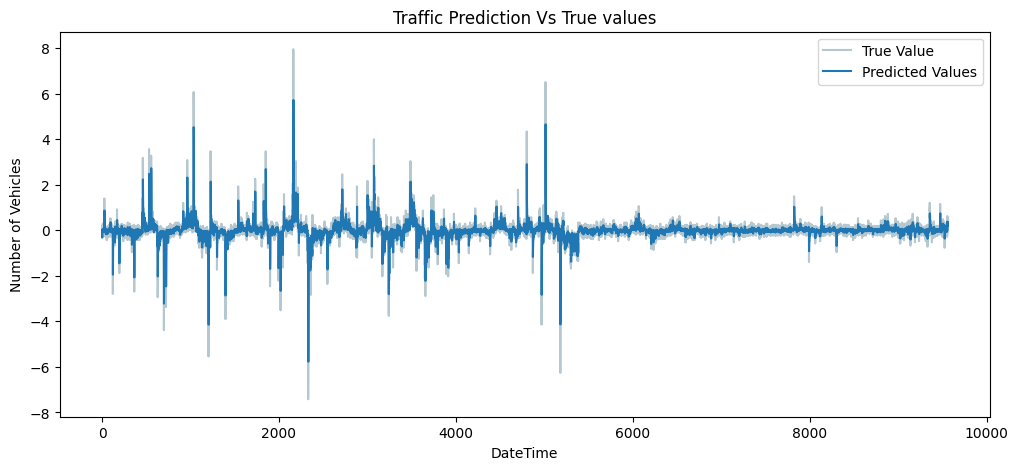

In [ ]:
import math
# Calculate RMSE and MAE for MLP model
RMSE_MLP = RMSE_Value(y_test, Pred_MLP)
MAE_MLP = MAE_Value(y_test, Pred_MLP)
# Plot predictions for MLP model
PredictionsPlot(y_test, Pred_MLP, 0)

In [ ]:
predictions2_df = pd.DataFrame({'True Values': y_test.flatten(), 'Predicted Values': Pred_MLP.flatten()})
predictions2_df.to_csv('predictions2.csv', index=False)